In [1]:
# This was for a school project. They wanted a lot of comments to show that I understood the material.
### RUN THIS FIRST ###
# The code in every other cell will throw errors if this cell is not run first. 
# Just getting things set up 

# Importing required libraries
import ipywidgets as widgets    # Widgets to creat interactive elements
import numpy as np   # NumPy to perform calculations
import pandas as pd    # Pandas to read data from CSV files
import matplotlib as mpl    # Matplotlib is used by other libraries
import matplotlib.pyplot as plt    # MatPlotLib for data visualization
import seaborn as sns    # seaborn for a cool heatmap

# Reading data from CSV files as Pandas DataFrames
tcsv = pd.read_csv("train.csv", parse_dates=['Date'])    # Historical training data
fcsv = pd.read_csv("features.csv", parse_dates=['Date'])    # Additional data related to store, dept, and region

# Creating some additional columns for analysis
tcsv["Week"] = [x.isocalendar().week for x in tcsv["Date"]]    # Week of the year
tcsv["Year"] = [x.year for x in tcsv["Date"]]    # Year 

# get list of store IDs for first dropdown
list_of_stores = tcsv["Store"].unique()

Jupyter Notebooks has support for over 100 programming languages. I'm choosing to use Python for this project because Python is widely known, easy to use, and is popular among the scientific, data science, and ML/AI communities. 

# Reading Data

I'm reading data from 2 CSV files. CSV files can be opened and edited in MS Excel, and many Excel files can be converted to CSV files. Jupyter Notebooks can also be converted to dashboards, and exported to other file formats including HTML and PDF. 

Note that I've added 2 columns that don't exist in the original CSV file provided by Walmart (Week, and Year). I'll use those columns for analysis later. 

In [2]:
tcsv.head(2)   # Let's see what's in our historical training data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Week,Year
0,1,1,2010-02-05,24924.50,False,5,2010
1,1,1,2010-02-12,46039.49,True,6,2010


In [3]:
fcsv.head(2)   # Now what's in this additional data? 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


## Analyzing Data

For the first demo, let's start with a very simple plot. We're just describing data here. This is just a simple scatter plot, but as you'll see soon, other chart types are supported. 

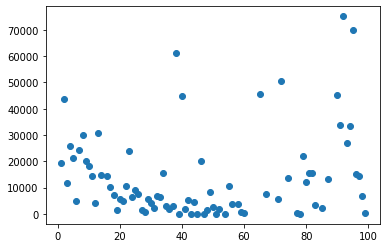

In [4]:
# Average sales of each department (all year, every store)
mean_sales_by_dept = tcsv[["Dept", "Weekly_Sales"]].groupby(["Dept"]).mean().round(decimals=2).sort_values("Weekly_Sales", ascending=False)

sct = plt.scatter(mean_sales_by_dept.index, mean_sales_by_dept["Weekly_Sales"])
display(sct)


The code for this next example is more complex because the chart is generated interactively. When you select a store and department number, a Python script will create a table on the fly (see below) with sales data for that specific department, grouped by week and year, and display a plot of that data. The 2013 column is generated by computing the average of the other columns. I've only used dropdowns for this demo, but other form elements (buttons, sliders, etc.) are supported. 

For this next section, run the cell, then choose a store number and a department number.

In [6]:
# INTERACTIVE CHARTS
# This is the Interactive Charts cell. Run this cell, then select a store
# and department number to view weekly sales for 2010-2012 and predicted
# weekly sales for 2013 based on the average of sales from previous years

# Create Widgets Output object
output_w = widgets.Output()

# Prevent the script from throwing errors when no store and department have been selected. 
store_selection = 1
dept_selection = 1

# Define event handlers for dropdowns. 
# ------------------
# These will listen for changes to the selected store or department
# then call the "Compute results" section to generate a dataframe
# that will be used to create and display a weekly sales chart. 

# Updates the table & chart if a new store number is selected
def store_dropdown_eventhandler(change):
    # Watch for changes in selection
    output_w.clear_output()
    with output_w:
        # Store store selection as a global
        global store_selection 
        store_selection = change.new

# Updates the table & chart if a new department number is selected
def dept_dropdown_eventhandler(change):
    # Watch for changes in selection
    output_w.clear_output()
    with output_w:
        # Store selected dept as global
        global dept_selection
        dept_selection = change.new
        # Display chart with new value
        plt.plot(df)
        plt.legend(df)
        plt.show()
# ------------------

# Define dropdowns 
# ------------------
# display store selection dropdown
store_selection_dropdown = widgets.Dropdown(options=[x for x in list_of_stores], description="Store", value=1)
store_selection_dropdown.observe(store_dropdown_eventhandler, names='value')
display(store_selection_dropdown)

# Display dept selection dropdown
store_depts = tcsv.loc[tcsv["Store"]==store_selection, "Dept"].unique()
dept_selection_dropdown = widgets.Dropdown(options=[x for x in store_depts], description="Department", value=1)
dept_selection_dropdown.observe(dept_dropdown_eventhandler, names='value')
display(dept_selection_dropdown)
# ------------------

# Compute results
# ------------------
# Retrieve sales data for the selected department
select_df = tcsv.loc[tcsv["Store"]==store_selection]
select_df = select_df.loc[select_df["Dept"]==dept_selection, ["Year", "Week", "Store", "Dept", "Weekly_Sales"]]

# Separate sales data for this store & dept by year
ws10 = select_df.loc[select_df["Year"]==2010, ["Week", "Store", "Dept", "Weekly_Sales"]]

# Convert the series into dictionaries - they're just easier to work with
ws10 = dict(zip(ws10["Week"], ws10["Weekly_Sales"]))
ws11 = select_df.loc[select_df["Year"]==2011, ["Week", "Store", "Dept", "Weekly_Sales"]]
ws11 = dict(zip(ws11["Week"], ws11["Weekly_Sales"]))
ws12 = select_df.loc[select_df["Year"]==2012, ["Week", "Store", "Dept", "Weekly_Sales"]]
ws12 = dict(zip(ws12["Week"], ws12["Weekly_Sales"]))

# Create new DataFrame with separate columns for each year
# This will be called by the event handlers when a store and department are selected.
idx = pd.Index([x for x in range(1,53)], name="Week")
df = pd.DataFrame(index=idx)
df["2010"] = [ws10[x] if x in ws10.keys() else np.nan for x in df.index]
df["2011"] = [ws11[x] if x in ws11.keys() else np.nan for x in df.index]
df["2012"] = [ws12[x] if x in ws12.keys() else np.nan for x in df.index]
df["2013"] = df.mean(axis=1).round(decimals=2)
# ------------------

# Display content
print('Please select a store number and a department number.')
display(output_w)


Dropdown(description='Store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, …

Dropdown(description='Department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,…

Please select a store number and a department number.


Output()

Let's look a little more deeply at this data set. This is a very small dataset - but does it contain any interesting correlation? 

In [9]:
# First, let's grab the data that we need from both CSV files, 
sales_by_date = tcsv[["Store", "Dept", "Date", "Weekly_Sales"]]
weekly_factors = fcsv[["Store", "Date", "Temperature", "Fuel_Price", "CPI", "Unemployment", "IsHoliday"]] 
# and use that to create a new table. 
weekly_data = sales_by_date.merge(weekly_factors)

# I'm leaving out the anonymized markdown data here. That data is not present for nearly half of the entries, 
# it's messy, and it doesn't provide information that would be useful for predicting sales by department. 
# A sale on bakery pies, for example, is unlikely to affect weekly sales for auto parts. 

display(weekly_data)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,42.31,2.572,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,58.85,3.882,192.308899,8.667,False
421566,45,94,2012-10-26,5203.31,58.85,3.882,192.308899,8.667,False
421567,45,95,2012-10-26,56017.47,58.85,3.882,192.308899,8.667,False
421568,45,97,2012-10-26,6817.48,58.85,3.882,192.308899,8.667,False


<AxesSubplot:>

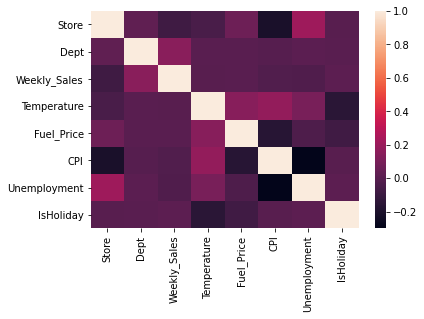

In [10]:
# Now for the results: (Make sure to run the previous cell before running this one, or you'll receive an error)
# Call Seaborn to generate a heatmap of correlation
X = weekly_data.iloc[:, :-1].values
y = weekly_data.iloc[:, 3].values

sns.heatmap(weekly_data.corr())